# Data Visualization

# Data Visualization
In Lesson 10, we will discuss the guiding principles for why we want to visualize data and how we can make effective visualizations. In this notebook, we introduce the libraries `matplotlib` and `seaborn` to make visualizations.

Before we begin, let's put a word of caution about how to approach learning these libraries:
> Trying to memorize all of these function calls and patterns is a ridiculous task. We will throw a lot of new functions at you very quickly and the intent is not for you to be able to memorize them all. The more important thing is to understand how to use them as examples and **adapt** those examples to the problem you are trying to solve. 
>
> The most important thing is to understand the big ideas we highlight about the code we are showing!

This means we won't always be able to explain every bit of code. The purpose is to give you some examples that you can run for your own projects or homeworks, even if you don't have the hundreds of pages of documentation memorized (because no one acually does that!).

We will discuss how to read documentation more in Lesson 10. This notebook is meant to be an introduction to see the general workflow of the code.

We will be using a modified dataset of Pokemon to explore how to visualize our data!

In [2]:
import pandas as pd

data = pd.read_csv('/home/pokemon.csv')

data  # For display

,Num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


We first start by importing our plotting libraries 
* `matplotlib` (commonly abreviated by `plt`) is a much older and very powerful plotting library.
* `seaborn` (commonly abbreviated by `sns`) is a newer visualization library popular for data science.

We primarily use `seaborn` due to its popularity in data science and it makes creating useful visualizations very easy. We will rely on `matplotlib` for some abilities to customize these visualizations. 

We also need to "set up" `seaborn` by calling `sns.set()` after importing it. 

Also, because this is in a Jupyter Notebook, we need to add a special directive to show the plots after the cell. This last step is something that only needs to be done in Jupyter Notebooks.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # Don't forget this!

# Only for Jupyter
%matplotlib inline

Let's start by making our first plot! We want to make a scatter plot that shows how Pokemon Attack and Defense compare. 

We will explain what this code does after this cell.

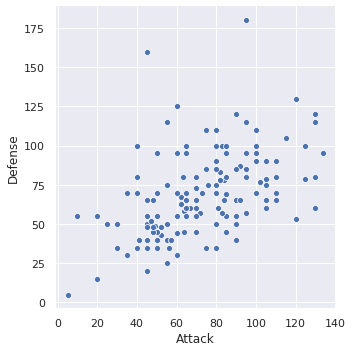

In [4]:
sns.relplot(x='Attack', y='Defense', data=data)

That's so cool that we can generate a pretty plot from so little code! 

The `relplot` function is just one example function you can call from `seaborn` (we will see more later). You can view the documentation for `relplot` [here](https://seaborn.pydata.org/generated/seaborn.relplot.html).

Here is how I would go about reading that documentation I just linked:
1. Skim examples, don’t focus too much on code
2. Read overview
3. Look at examples and the code. Look at documentation for relevant parameters
4. (Sometimes, if necessary) Skim parameter list

Looking through the examples on that page, I see that I can set the size of the dots by some other value. Let's go ahead and do that!

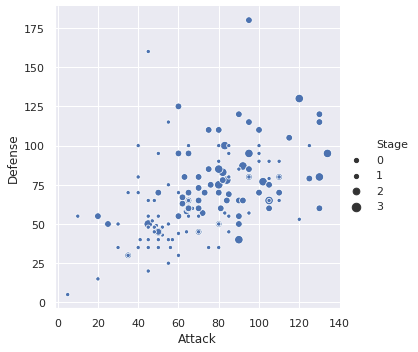

In [9]:
sns.relplot(x='Attack', y='Defense', size='Stage', data=data)

We recommend using the following functions for possible things to plot (notice that most of them can generate different types of plots with the `kind` parameter).
* [Bar/Violin Plot](https://seaborn.pydata.org/generated/seaborn.catplot.html)
* [Plot a Distribution](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
* [Scatter/Line Plot](https://seaborn.pydata.org/generated/seaborn.relplot.html)
* [Linear Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html)
* [Compare Two Variable](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
* [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)

Again, you do not need to memorize these functions or their parameters. You might want to look through their examples to see all the different types of plots you can make!

> **Warning**: These pages of documentation link to other functions in `seaborn` for plotting. We recommend you stick to these ones using the `kind` parameter rather than using the other functions since they have a slightly different behavior. 80% of bugs on HW3 related to plotting are students using other `seaborn` functions that aren't one of the 6 listed above! 

Let's try using another one of those functions to make a plot to show how many Pokemon are of each type!

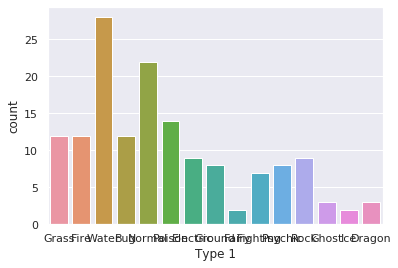

In [10]:
sns.catplot(x='Type 1', kind='count', data=data)

This plot has one big problem and one minor one. 
1. Big: You can't read the x-axis which violates the major rule of making your visualization readable.
2. Minor: It's not necessarily a bad idea to encode the bars with different colors to emphasize they are different types (in fact, it sometimes can help by encoding information twice), but in this case, it doesn't necessarily make anything clearer.

Looking at the documentation for `catplot`, we see we can make the bars the same color with the `color` parameter. `'b'` in this context means "blue".

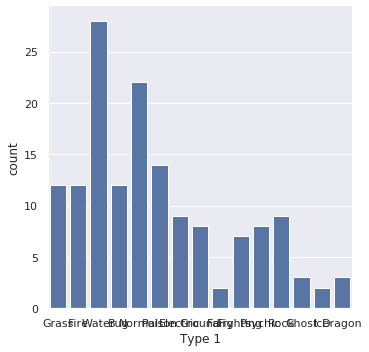

In [10]:
sns.catplot(x='Type 1', kind='count', color='b', data=data)

Then we need to fix the axis issue. `seaborn` does a great job making visualizations that look pretty good by default, but makes it really hard to customize them in small ways. This is is where `matplotlib` comes in to help us customize the chart. 

To fix this specific issue of being unable to read the x-axis, we need to rotate the x-axis ticks. The following cell does that using `matplotlib`.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

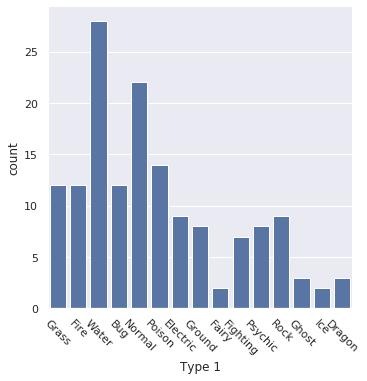

In [11]:
sns.catplot(x='Type 1', kind='count', color='b', data=data)
plt.xticks(rotation=-45)

For your homework, we would not expect you to try to learn the `matplotlib` library (as it is huge and complex) to make minor adjustments to your plots. Instead, we will commonly ask you to use the following three:
* `plt.title('My Title')`: To set the title of the chart
* `plt.xlabel('X-Axis Label')`: To set the x-axis label
* `plt.ylabel('Y-Axis Label')`: To set the y-axis label

The following cell shows how to set all of these for the bar-plot.

Text(10.175000000000004, 0.5, 'Number of Pokemon')

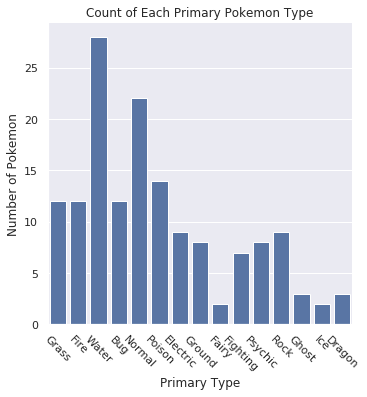

In [15]:
sns.catplot(x='Type 1', kind='count', color='b', data=data)
plt.xticks(rotation=-45)

plt.title('Count of Each Primary Pokemon Type')
plt.xlabel('Primary Type')
plt.ylabel('Number of Pokemon')

# Expectations
For the most part, that's all we are going to discuss in depth for data visualization at this time. We will revisit this topic later in the quarter to show how to make more complex plots (e.g., ones where you make two plots side-by-side).

The rationale here is we actually want to use data visualization as an opportunity for you to learn the skill of looking at documentation to build your own working knowledge. This much better reflects the learning you will need to do in the real world, and `seaborn` is such a great case-study for this because their documentation is incredible.

You won't have to dig super deep though, for the most part we show you that you only need to look at the documentation for the pages we listed above (shown below for convenience).

* [Bar/Violin Plot](https://seaborn.pydata.org/generated/seaborn.catplot.html)
* [Plot a Distribution](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
* [Scatter/Line Plot](https://seaborn.pydata.org/generated/seaborn.relplot.html)
* [Linear Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html)
* [Compare Two Variable](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
* [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)